In [9]:
import os
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.io import wavfile



In [2]:
p_path = os.path.join('pickles', 'conv.p')
with open(p_path, 'rb') as handle:
    config = pickle.load(handle)

In [3]:
model = load_model(config.model_path)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 4, 16)         160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 4, 32)         4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 4, 64)         18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 4, 128)        73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 2, 128)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 2, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7680)              0

In [5]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 1, 16)
conv2d_1 (3, 3, 16, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 128)


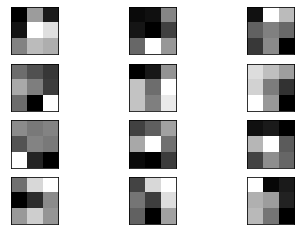

In [6]:
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 4, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
# pyplot.show()

In [7]:
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('data/train/roadsound_labels.csv', index_col=0)
df.set_index('fname', inplace=True)
for f in df.index:
    rate, signal = wavfile.read('clean/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

In [22]:
train_df, test_df, train_y, test_y = train_test_split(df, df['labels'])

In [26]:
train_y

fname
24134a34.wav                Bicycle_bell
0b76a30a.wav                  Motorcycle
d59af808.wav                Bicycle_bell
e1dc44f4.wav                  Skateboard
0c8fd5b4.wav                Bicycle_bell
                          ...           
8a5a7e98.wav                  Motorcycle
de4974c3.wav                         Bus
e8581680.wav                Bicycle_bell
4bcb0d99.wav    Race_car_and_auto_racing
5c04107c.wav                  Motorcycle
Name: labels, Length: 222, dtype: object